In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/fcc-forum-pageviews.csv")
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [ ]:
'''
Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
'''

df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace = True)
'''
Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
'''
df = df[(df['value'] >= df['value'].quantile(0.025))]
df = df[(df['value'] <= df['value'].quantile(0.975))]



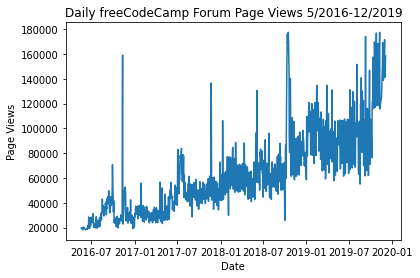

In [ ]:
# line chart
plt.plot(df.index, df['value'])
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.show()

df_bar = df.copy()
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month

df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack() 


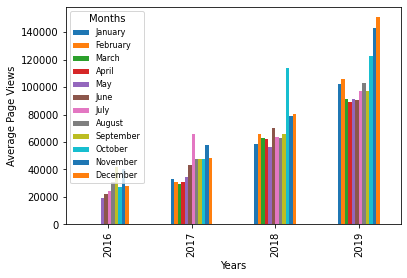

In [ ]:
# bar chart
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig = df_bar.plot.bar()
fig.legend(months, title='Months', prop={'size': 8})
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.show()



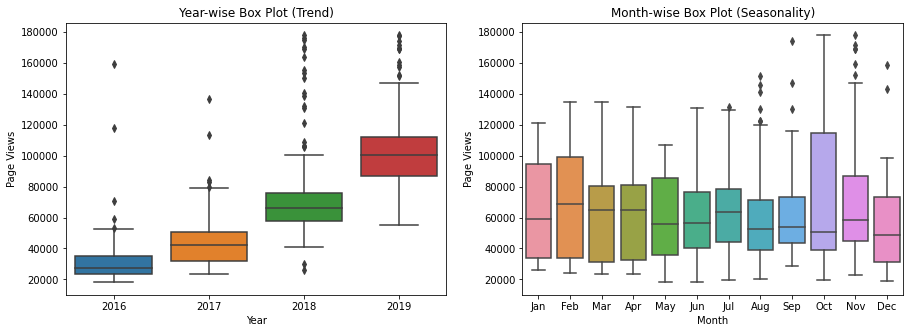

In [ ]:
# box plot
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box['monum'] = df_box['date'].dt.month
df_box = df_box.sort_values('monum')

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(ax=ax[0], x='year', y='value', data=df_box).set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
sns.boxplot(ax=ax[1], x='month', y='value', data=df_box ).set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")
plt.show()